In [12]:
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

/home/qkd1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  # Remove the CWD from sys.path while we load stuff.


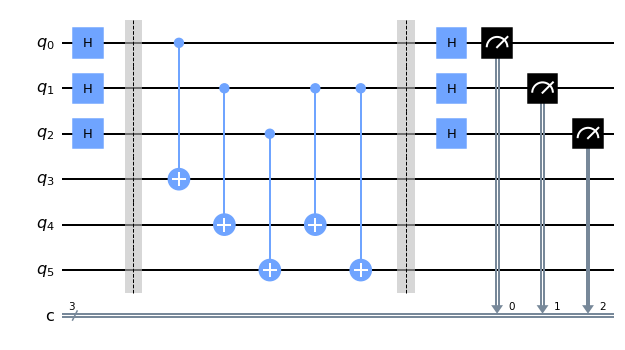

In [13]:
b='110'
n = len(b)
simon_circuit =  QuantumCircuit(2*n,n)

#applying hadamard gate on the first register

simon_circuit.h(range(n))
simon_circuit.barrier()
#adding the oracle
simon_circuit+=simon_oracle(b)
simon_circuit.barrier()
#adding hadamard gate to the first register
simon_circuit.h(range(n))

#measure qubit
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output='mpl')


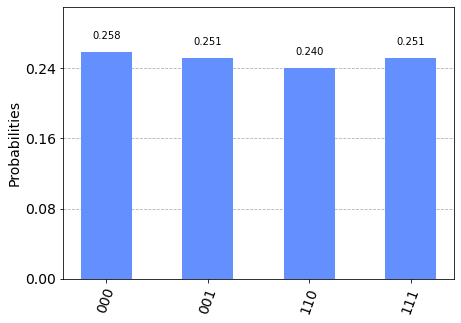

In [14]:
#using local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results= aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [15]:
#the secret string was already known, so here we will verify it

def bdotz(b,z):
    accum = 0 
    for i in range (len(b)):
        accum += int(b[i])* int(z[i])
    return (accum % 2)

for z in counts:
    print ('{}.{}={}  mod(2)'.format(b,z,bdotz(b,z)))

110.110=0  mod(2)
110.000=0  mod(2)
110.001=0  mod(2)
110.111=0  mod(2)


/home/qkd1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  # Remove the CWD from sys.path while we load stuff.


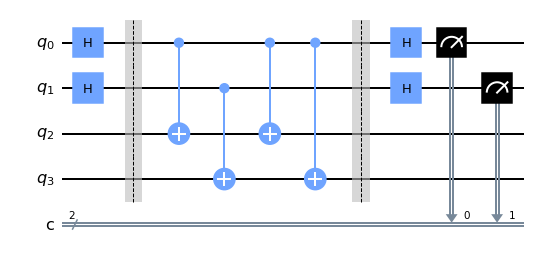

In [19]:
b='11'
n = len(b)
simon_circuit2 =  QuantumCircuit(2*n,n)

#applying hadamard gate on the first register

simon_circuit2.h(range(n))
simon_circuit2.barrier()
#adding the oracle
simon_circuit2+=simon_oracle(b)
simon_circuit2.barrier()
#adding hadamard gate to the first register
simon_circuit2.h(range(n))

#measure qubit
simon_circuit2.measure(range(n), range(n))
simon_circuit2.draw(output='mpl')


In [20]:
#attempting this on actual quantum device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_bogota


In [22]:
from qiskit.tools.monitor import job_monitor
shots = 1024
trans_simon_circuit = transpile(simon_circuit2, backend, optimization_level=3)
qobj=assemble(trans_simon_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/qkd1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  """


Job Status: job has successfully run


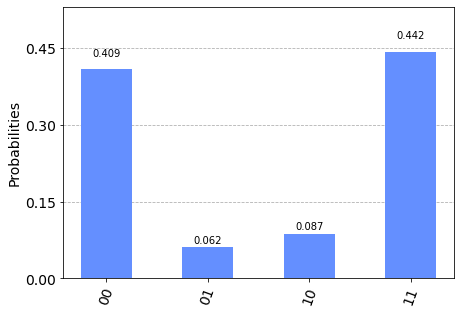

In [23]:
#getting results
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [25]:
#the secret string was already known, so here we will verify it

def bdotz(b,z):
    accum = 0 
    for i in range (len(b)):
        accum += int(b[i])* int(z[i])
    return (accum % 2)

for z in device_counts:
    print ('{}.{}={}  mod(2)'.format(b,z,bdotz(b,z)))

11.00=0  mod(2)
11.01=1  mod(2)
11.10=1  mod(2)
11.11=0  mod(2)


In [ ]:
# final result: 00 is the trivial case and corresponds to one to one mapping, hence our answer here
# would be b = 11
# As can be verified in the oracle argument